In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [2]:
df_wine = pd.read_csv('wine.csv', header=None)

In [3]:
df_wine.columns = [ 'Class label','Alcohol','Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [4]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Alcalinity, magnesium, color y proline tienen desviaciones estandar grandes, quiza sean elementos que ayuden a inferir

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [6]:
X= df_wine[df_wine.columns[1:]]
y= df_wine['Class label']

In [33]:
mms = MinMaxScaler()
sd = StandardScaler()
X_norm= mms.fit_transform(X)
X_std = sd.fit_transform(X)
df_wine[df_wine.columns[1:]] = X_norm

In [34]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.775035,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,2.000000,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,3.000000,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
wine_byclass = df_wine.groupby(by='Class label')

In [36]:
means = wine_byclass.mean()
meansDf = pd.DataFrame(means)

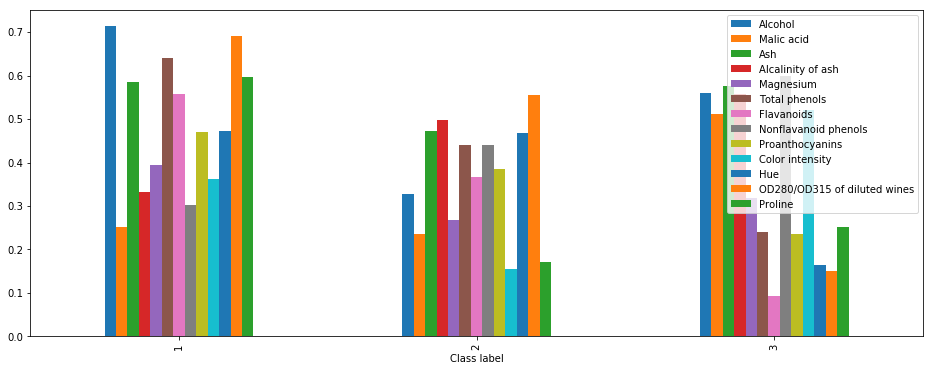

In [37]:
meansDf.plot.bar(figsize=(16,6), legend=True)

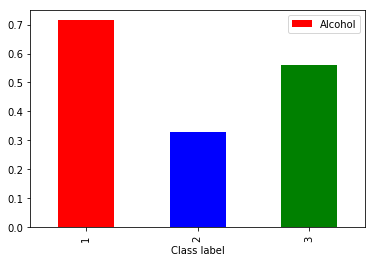

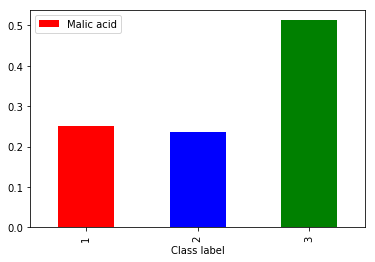

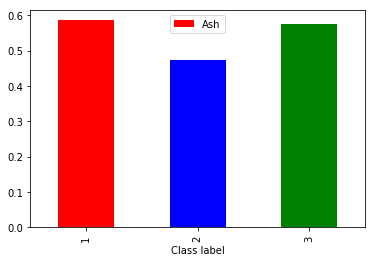

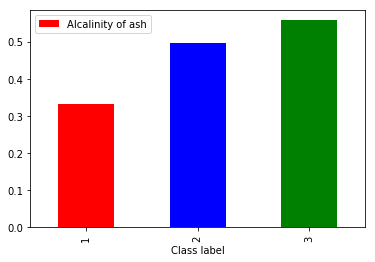

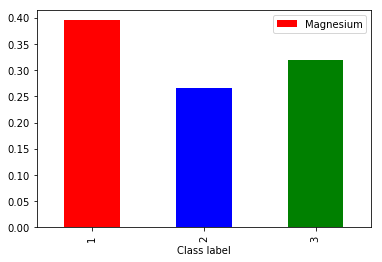

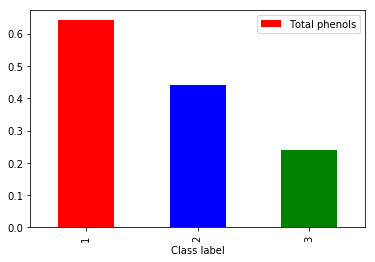

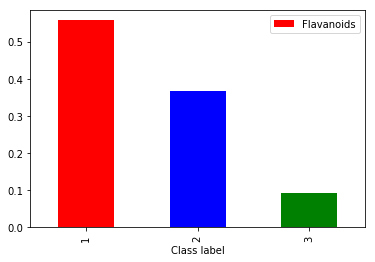

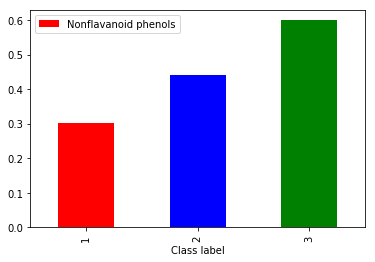

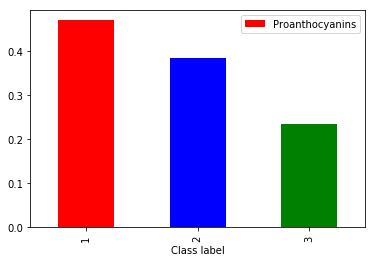

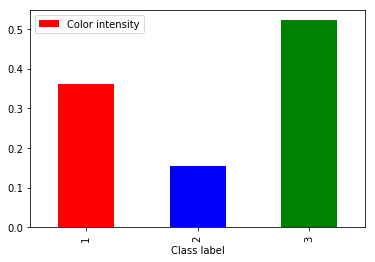

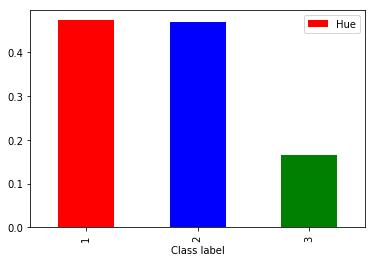

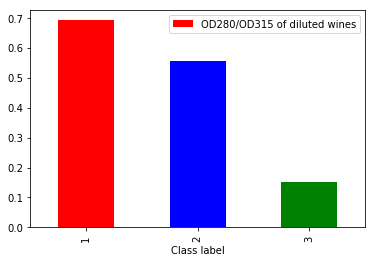

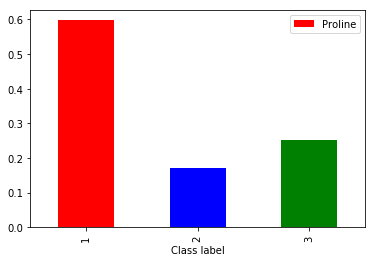

In [38]:
[meansDf.plot.bar(y = c, color=['red','blue','green']) for c in meansDf.columns]

In [39]:
def boxPlots(X,C_labels,by,columns):
    for column in columns:
        temp = list()
        for c in C_labels:
            temp.append(X[X[by]==c][column].values)
        temp = np.asarray(temp)
        plt.boxplot(temp)
        plt.title(column)
        plt.show()

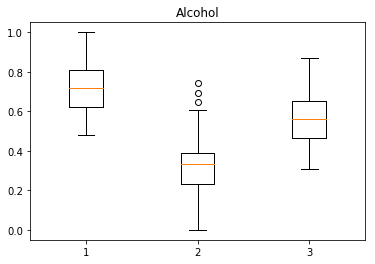

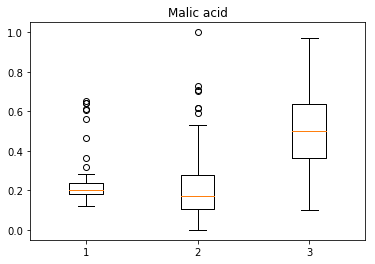

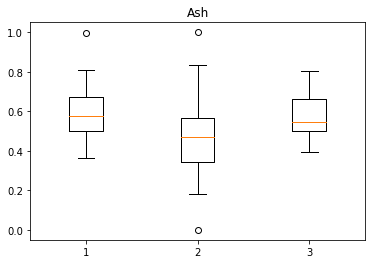

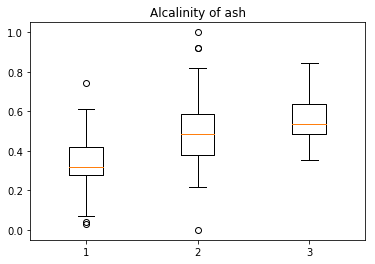

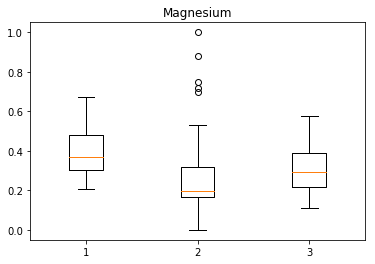

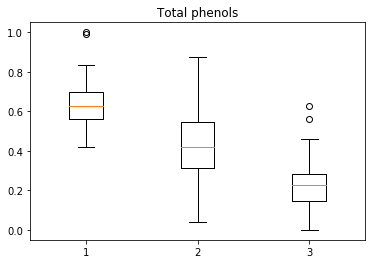

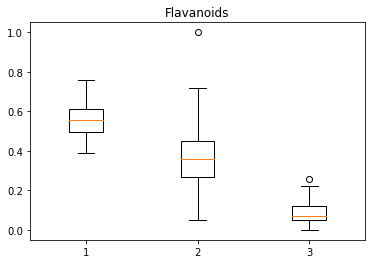

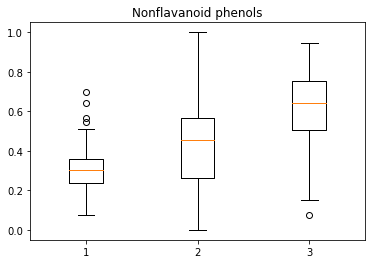

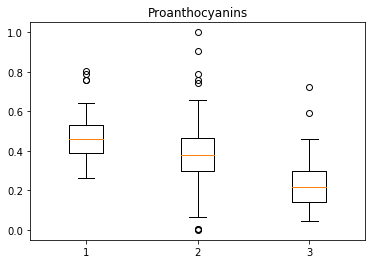

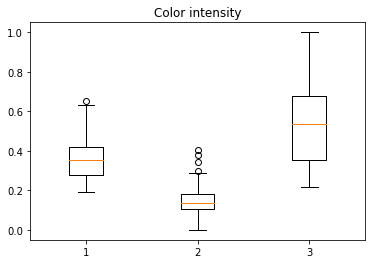

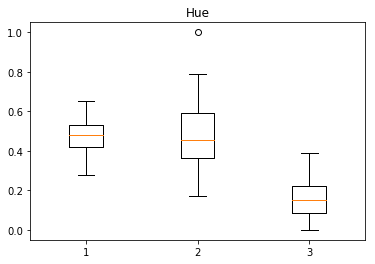

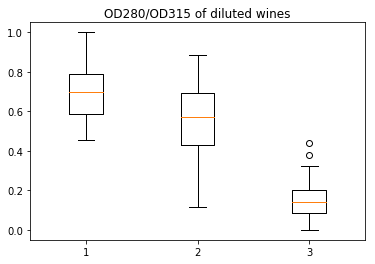

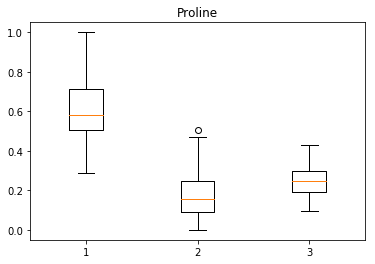

In [40]:
boxPlots(df_wine,C_labels=np.arange(1,4),by='Class label',columns= df_wine.columns[1:])

In [41]:
def scatterPlot(X,Y,df):
    color = {1:'red', 2:'blue', 3:'green'}
    fig = plt.figure()
    for i in range(1,4):
        plt.scatter(df[df['Class label']==i][X], df[df['Class label']==i][Y], c= color[i])
        plt.xlabel(X)
        plt.ylabel(Y)
    plt.show()

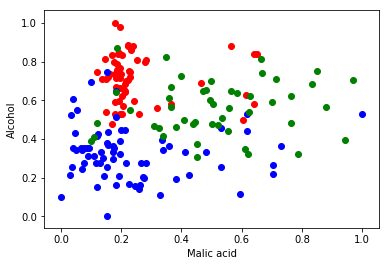

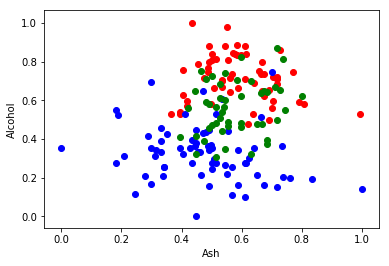

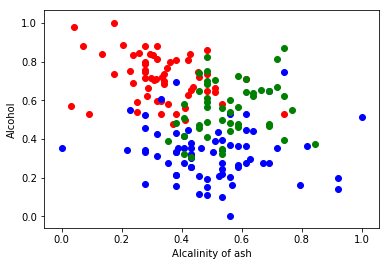

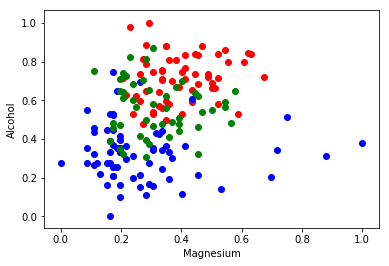

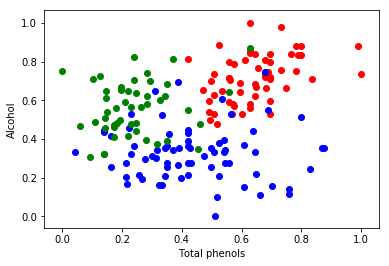

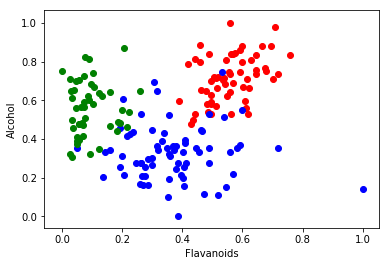

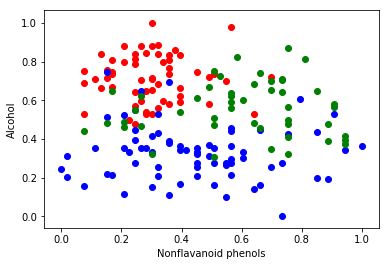

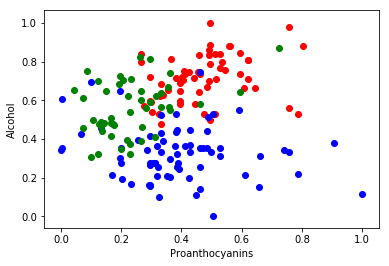

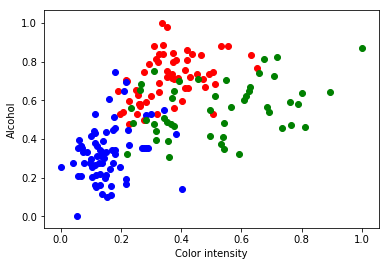

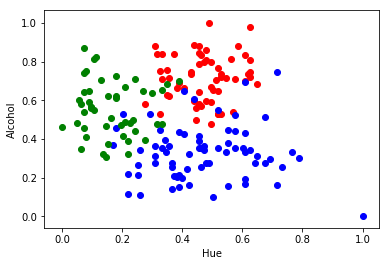

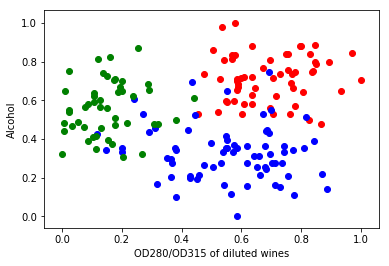

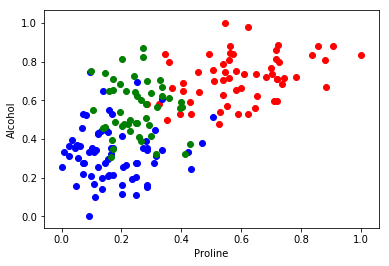

[None, None, None, None, None, None, None, None, None, None, None, None]

In [42]:
[scatterPlot(c,'Alcohol', df_wine) for c in df_wine.columns[2:]]

Alcohol, total phenols, flavanoids, Color intensity,OD280/OD315 of diluted wines I think are important features that can help to predict correctly. After seeing the Scatterplot we can see that the distribution for each class does not have a treshold for the others, so a logistic metod or a probabilistic one can help to reach a very good performance

### Classification ML

In [44]:
df_wine[df_wine.columns[1:]] = X_std

In [45]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
from sklearn import model_selection, metrics

In [47]:
X_train,X_test,y_train, y_test = model_selection.train_test_split(X_std, y, test_size = 0.3, random_state = 0)

Accuracy: 1.000000
Confusion matrix, without normalization
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


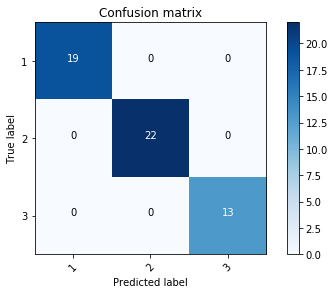

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression();
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_hat)))
cm = metrics.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(cm,np.arange(1,4))

Accuracy: 0.962963
Confusion matrix, without normalization
[[18  1  0]
 [ 0 21  1]
 [ 0  0 13]]


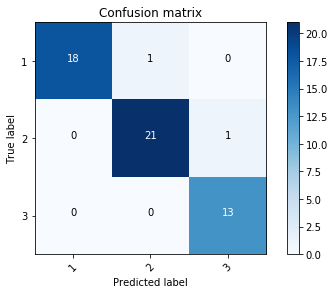

In [49]:
from sklearn import tree
tr = tree.DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_tree = tr.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_tree)))
cm = metrics.confusion_matrix(y_test,y_tree)
plot_confusion_matrix(cm,np.arange(1,4))

Accuracy: 1.000000
Confusion matrix, without normalization
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


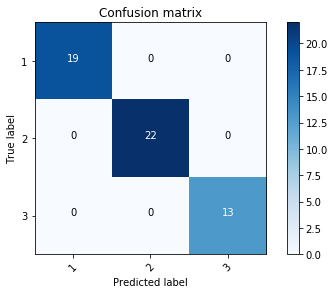

In [50]:
from sklearn import ensemble
fst = ensemble.RandomForestClassifier()
fst.fit(X_train, y_train)
y_fst = fst.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_fst)))
cm = metrics.confusion_matrix(y_test,y_fst)
plot_confusion_matrix(cm,np.arange(1,4))

Accuracy: 1.000000
Confusion matrix, without normalization
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


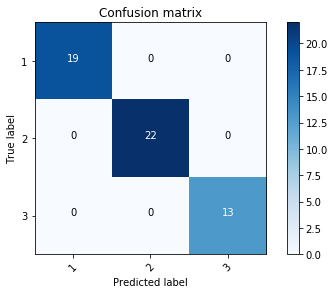

In [51]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_svm)))
cm = metrics.confusion_matrix(y_test,y_svm)
plot_confusion_matrix(cm,np.arange(1,4))

Accuracy: 1.000000
Confusion matrix, without normalization
[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


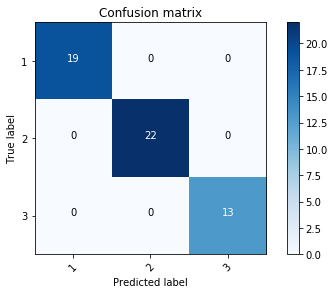

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
print('Accuracy: %f' % (metrics.accuracy_score(y_test,y_knn)))
cm = metrics.confusion_matrix(y_test,y_knn)
plot_confusion_matrix(cm,np.arange(1,4))

In general all the ML algorithms performed a good, but the best where Knn, SVM and Forest. Trees doesn't perform so well and once we see the scatterplot of all the data we see why: there is not a treshold between t

## Using SBS for Feature Selection

In [53]:
import SBS_tool

In [54]:
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS_tool.SBS(knn, k_features = 1)
sbs.fit(X_train,y_train)

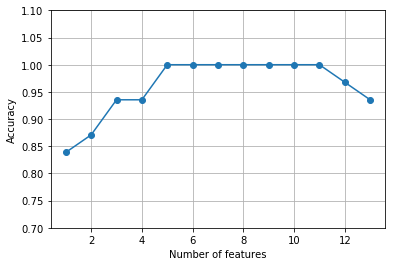

In [55]:
k_feat=[len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker = 'o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [56]:
k5 = list(sbs.subsets_[8]) # the list is backward, remember
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [57]:
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))

Training accuracy: 0.975806451613


In [58]:
print('Test accuracy:', knn.score(X_test, y_test))

Test accuracy: 0.944444444444


In [59]:
knn.fit(X_train[:,k5], y_train)
print('Training accuracy:', knn.score(X_train[:,k5], y_train))

Training accuracy: 0.951612903226


In [60]:
print('Test accuracy:', knn.score(X_test[:,k5], y_test))

Test accuracy: 0.944444444444


# Assessing feature importance with random forests

In [61]:
feat_labels = df_wine.columns[1:]
forest = ensemble.RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices= np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


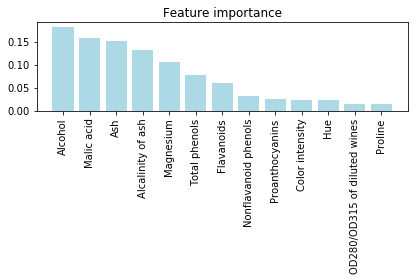

In [63]:
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align = 'center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [68]:
X_selected = forest.transform(X_train, threshold = 0.15) 
#this parameter allows to only conserve features with more than 0.15 of importance
X_selected.shape

C:\Users\sa-al\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(124, 3)